In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting Up LLM Inference

In [2]:
from get_prob import get_prob
from vllm import LLM
from transformers import AutoTokenizer

model_name = "Qwen/Qwen3-8B"

llm = LLM(
    model=model_name,
    tensor_parallel_size=1,
    gpu_memory_utilization=0.95,
    max_model_len=128, 
    max_num_seqs=1, # Only one token needed for generation
)
tokenizer = AutoTokenizer.from_pretrained(model_name)


/home/lee/ml_projects/llm_coord_images/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 10-25 13:38:48 [__init__.py:216] Automatically detected platform cuda.
INFO 10-25 13:38:49 [utils.py:233] non-default args: {'max_model_len': 128, 'gpu_memory_utilization': 0.95, 'max_num_seqs': 1, 'disable_log_stats': True, 'model': 'Qwen/Qwen3-8B'}
INFO 10-25 13:38:49 [model.py:547] Resolved architecture: Qwen3ForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!


INFO 10-25 13:38:49 [model.py:1510] Using max model len 128


2025-10-25 13:38:49,873	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 10-25 13:38:49 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
WARNING 10-25 13:38:49 [scheduler.py:252] max_num_batched_tokens (8192) exceeds max_num_seqs * max_model_len (128). This may lead to unexpected behavior.
WARNING 10-25 13:38:49 [scheduler.py:252] max_num_batched_tokens (8192) exceeds max_num_seqs * max_model_len (128). This may lead to unexpected behavior.
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:50 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:50 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='Qwen/Qwen3-8B', speculative_config=None, tokenizer='Qwen/Qwen3-8B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantiz

Loading safetensors checkpoint shards:   0% Completed | 0/5 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  20% Completed | 1/5 [00:00<00:01,  3.88it/s]
Loading safetensors checkpoint shards:  40% Completed | 2/5 [00:00<00:00,  5.04it/s]
Loading safetensors checkpoint shards:  60% Completed | 3/5 [00:00<00:00,  3.76it/s]
Loading safetensors checkpoint shards:  80% Completed | 4/5 [00:01<00:00,  3.14it/s]
Loading safetensors checkpoint shards: 100% Completed | 5/5 [00:01<00:00,  2.89it/s]
Loading safetensors checkpoint shards: 100% Completed | 5/5 [00:01<00:00,  3.22it/s]
(EngineCore_DP0 pid=323811) 


(EngineCore_DP0 pid=323811) INFO 10-25 13:38:53 [default_loader.py:267] Loading weights took 1.63 seconds
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:54 [gpu_model_runner.py:2653] Model loading took 15.2683 GiB and 1.921637 seconds
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:57 [backends.py:548] Using cache directory: /home/lee/.cache/vllm/torch_compile_cache/ddcf301aeb/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:57 [backends.py:559] Dynamo bytecode transform time: 3.03 s
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:58 [backends.py:164] Directly load the compiled graph(s) for dynamic shape from the cache, took 0.938 s
(EngineCore_DP0 pid=323811) INFO 10-25 13:38:59 [monitor.py:34] torch.compile takes 3.03 s in total
(EngineCore_DP0 pid=323811) INFO 10-25 13:39:01 [gpu_worker.py:298] Available KV cache memory: 6.28 GiB
(EngineCore_DP0 pid=323811) INFO 10-25 13:39:01 [kv_cache_utils.py:1087] GPU KV cache size: 45,728 tokens
(EngineCore_DP0 pi

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 3/3 [00:00<00:00, 33.20it/s]
Capturing CUDA graphs (decode, FULL): 100%|██████████| 1/1 [00:00<00:00, 33.24it/s]


(EngineCore_DP0 pid=323811) INFO 10-25 13:39:02 [gpu_model_runner.py:3480] Graph capturing finished in 1 secs, took 0.07 GiB
(EngineCore_DP0 pid=323811) INFO 10-25 13:39:02 [core.py:210] init engine (profile, create kv cache, warmup model) took 8.26 seconds
INFO 10-25 13:39:02 [llm.py:306] Supported_tasks: ['generate']


## Simple test, showing that 2+2=4 and 2+3=5 are likely outputs

In [3]:
softmax_probs = get_prob(
    llm=llm,
    tokenizer=tokenizer,
    system_prompt_string="You are a helpful assistant. Answer immediately without any thinking out loud or explanation.",
    user_prompt_strings=["What is 2 + 2?", "What is 2 + 3?"],
    answer_start_string="The answer is ",
    answer_end_strings=["4.", "5."],
    print_all_probs=False,
    print_all_answer_probs=False,
)

print("LLM prob that 2+2=4: ", softmax_probs[0][0])
print("LLM prob that 2+2=5: ", softmax_probs[0][1])
print("LLM prob that 2+3=4: ", softmax_probs[1][0])
print("LLM prob that 2+3=5: ", softmax_probs[1][1])


100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

LLM prob that 2+2=4:  0.9999997618685881
LLM prob that 2+2=5:  2.3813141197911756e-07
LLM prob that 2+3=4:  5.211378316664299e-10
LLM prob that 2+3=5:  0.9999999994788621


# Circle Generation

In [4]:
circle_x_coords = np.linspace(-1.5, 1.5, 31)
circle_y_coords = np.linspace(-1.5, 1.5, 31)

coord_strs = []
for i in range(len(circle_x_coords)):
    for j in range(len(circle_y_coords)):
        coord_strs.append(f"({round(circle_x_coords[i], 3)}, {round(circle_y_coords[j], 3)})")
prompt_strings = [f"Is this point inside a circle centered on (0, 0) with radius 1? {coord_str}." for coord_str in coord_strs]

prompt_strings[:5]

['Is this point inside a circle centered on (0, 0) with radius 1? (-1.5, -1.5).',
 'Is this point inside a circle centered on (0, 0) with radius 1? (-1.5, -1.4).',
 'Is this point inside a circle centered on (0, 0) with radius 1? (-1.5, -1.3).',
 'Is this point inside a circle centered on (0, 0) with radius 1? (-1.5, -1.2).',
 'Is this point inside a circle centered on (0, 0) with radius 1? (-1.5, -1.1).']

In [5]:
circle_probs = get_prob(
    llm=llm,
    tokenizer=tokenizer,
    system_prompt_string="You are a helpful assistant. Answer immediately without any thinking out loud or explanation.",
    user_prompt_strings=prompt_strings,
    answer_start_string="",
    answer_end_strings=["Yes.", "No."],
)


100%|██████████| 961/961 [01:18<00:00, 12.30it/s]


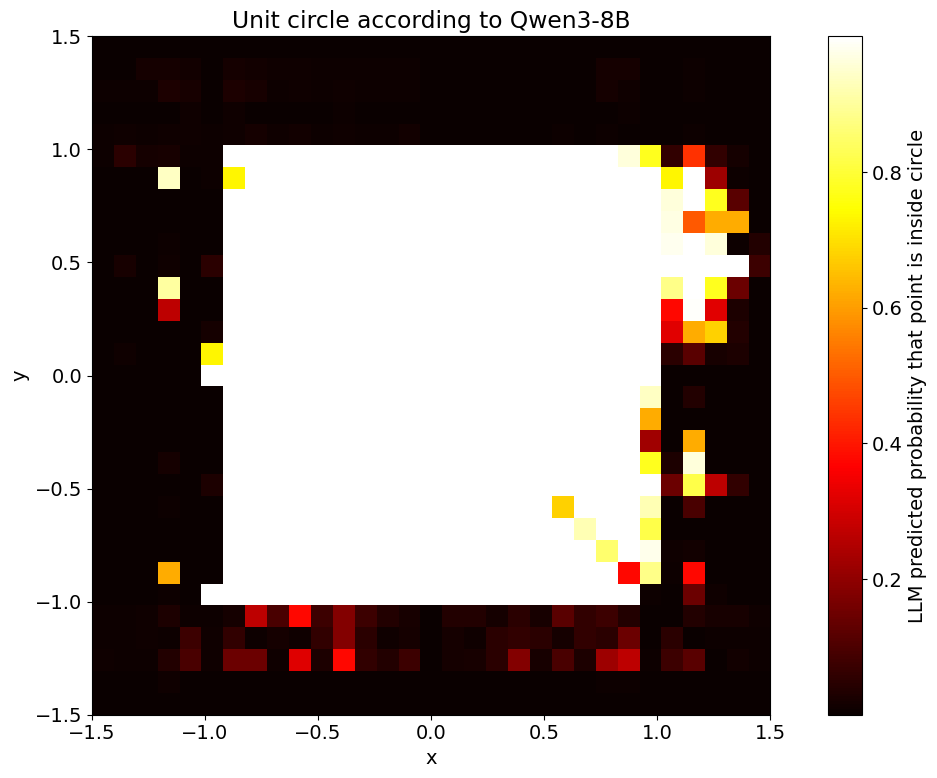

In [15]:
plt.rcParams.update({'font.size': 14})

in_set_circle_probs = [softmaxes[0] for softmaxes in circle_probs]
two_d_in_set_circle_probs = np.array(in_set_circle_probs).reshape(len(circle_x_coords), len(circle_y_coords))

plt.figure(figsize=(12, 8))
plt.imshow(two_d_in_set_circle_probs, cmap='hot', extent=[-1.5, 1.5, -1.5, 1.5])
plt.colorbar(label='LLM predicted probability that point is inside circle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unit circle according to Qwen3-8B')
plt.tight_layout()
plt.savefig('plots/circle_qwen3-8b.jpg')


# Mandelbrot Set

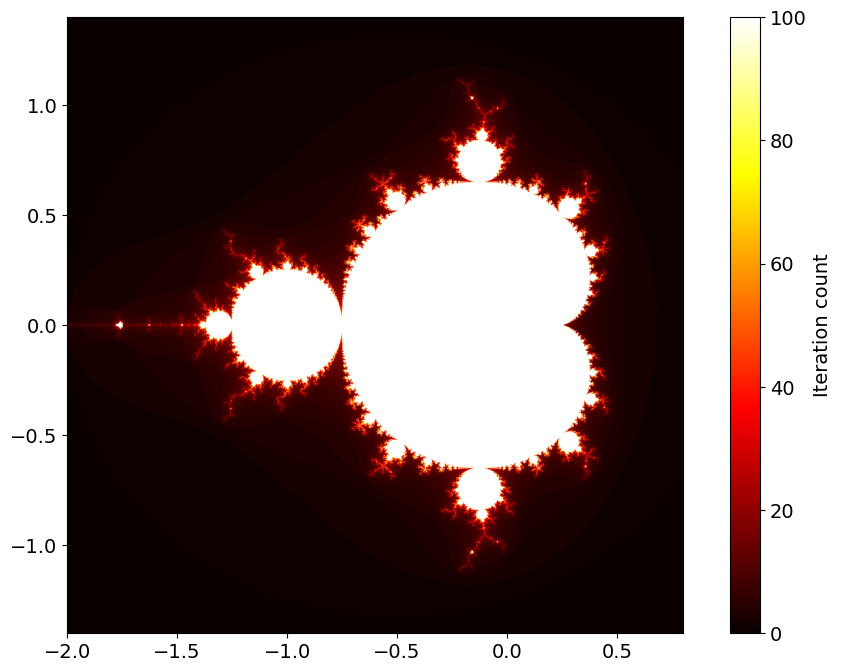

In [18]:
def mandelbrot_fast(h, w, max_iter):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)
    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2
    return divtime

h, w = 1000, 1500
max_iter = 100
plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot_fast(h, w, max_iter), cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
plt.colorbar(label='Iteration count')
plt.savefig('plots/mandelbrot_high_res.jpg')


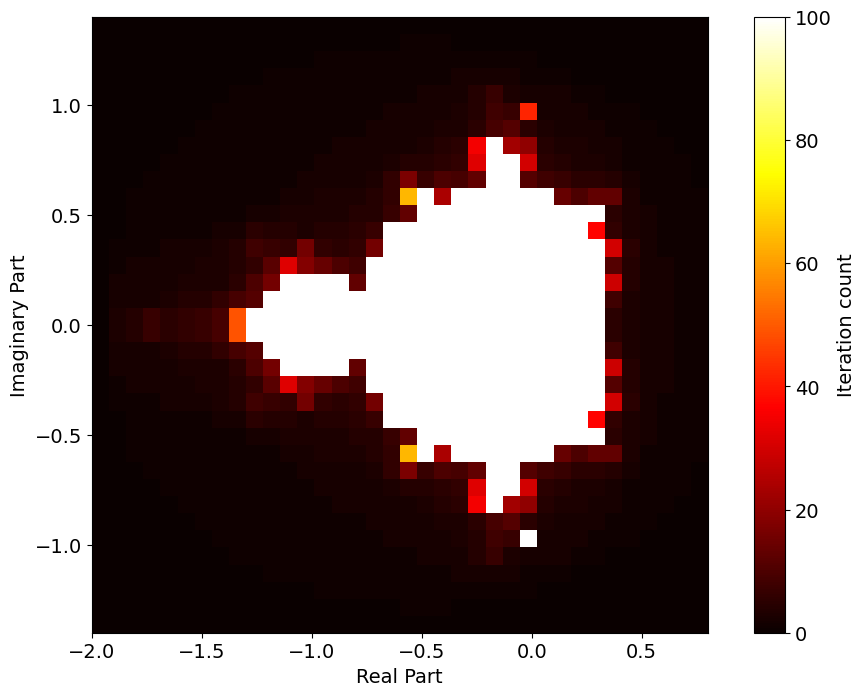

In [17]:
mandelbrot_x_coords = np.linspace(-2, 0.8, 36)
mandelbrot_y_coords = np.linspace(-1.4, 1.4, 36)

def mandelbrot(mandelbrot_x_coords, mandelbrot_y_coords):
    divtime = np.full((len(mandelbrot_x_coords), len(mandelbrot_y_coords)), max_iter)
    for i in range(len(mandelbrot_x_coords)):
        for j in range(len(mandelbrot_y_coords)):
            c = mandelbrot_x_coords[j] + mandelbrot_y_coords[i]*1j
            z = c
            for iter in range(100):
                z = z*z + c
                if abs(z) > 2:
                    divtime[i,j] = iter
                    break
    return divtime
plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot(mandelbrot_x_coords, mandelbrot_y_coords), cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
plt.colorbar(label='Iteration count')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.savefig('plots/mandelbrot_low_res.jpg')


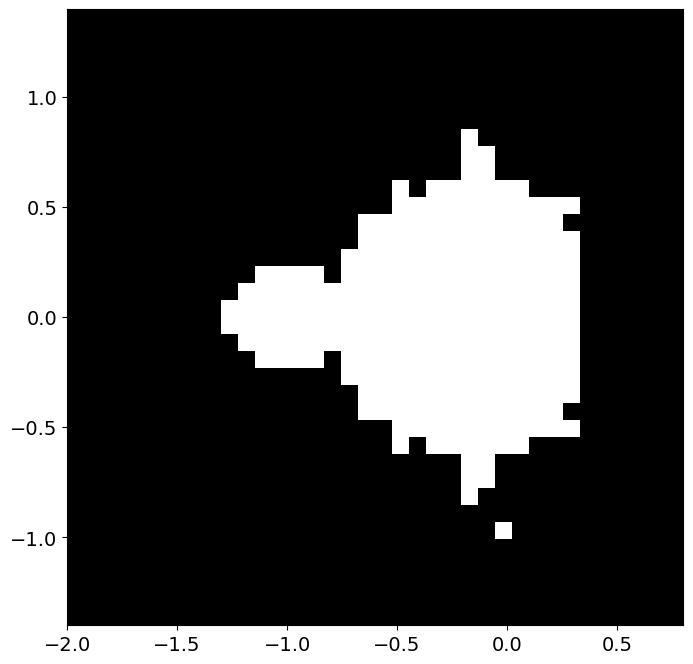

In [16]:
def mandelbrot_binary(mandelbrot_x_coords, mandelbrot_y_coords):
    in_set = np.ones((len(mandelbrot_x_coords), len(mandelbrot_y_coords)), dtype=bool)
    for i in range(len(mandelbrot_x_coords)):
        for j in range(len(mandelbrot_y_coords)):
            c = mandelbrot_x_coords[j] + mandelbrot_y_coords[i]*1j
            z = c
            for iter in range(max_iter):
                z = z*z + c
                if abs(z) > 2:
                    in_set[i,j] = False
                    break
    return in_set
plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot_binary(mandelbrot_x_coords, mandelbrot_y_coords), cmap='binary_r', extent=[-2, 0.8, -1.4, 1.4])
plt.savefig('plots/mandelbrot_binary.jpg')


In [10]:
c_strs = []
for i in range(len(mandelbrot_x_coords)):
    for j in range(len(mandelbrot_y_coords)):
        c = mandelbrot_x_coords[i] + mandelbrot_y_coords[j]*1j
        c_strs.append(f"{round(c.real, 3)} + {round(c.imag, 3)}i")
prompt_strings = [f"Is this point inside the Mandelbrot set? {c_str}." for c_str in c_strs]

prompt_strings[:5]

['Is this point inside the Mandelbrot set? -2.0 + -1.4i.',
 'Is this point inside the Mandelbrot set? -2.0 + -1.32i.',
 'Is this point inside the Mandelbrot set? -2.0 + -1.24i.',
 'Is this point inside the Mandelbrot set? -2.0 + -1.16i.',
 'Is this point inside the Mandelbrot set? -2.0 + -1.08i.']

In [11]:
mandelbrot_probs = get_prob(
    llm=llm,
    tokenizer=tokenizer,
    system_prompt_string="You are a helpful assistant. Answer immediately without any thinking out loud or explanation.",
    user_prompt_strings=prompt_strings,
    answer_start_string="",
    answer_end_strings=["Yes.", "No."],
)


100%|██████████| 1296/1296 [01:25<00:00, 15.23it/s]


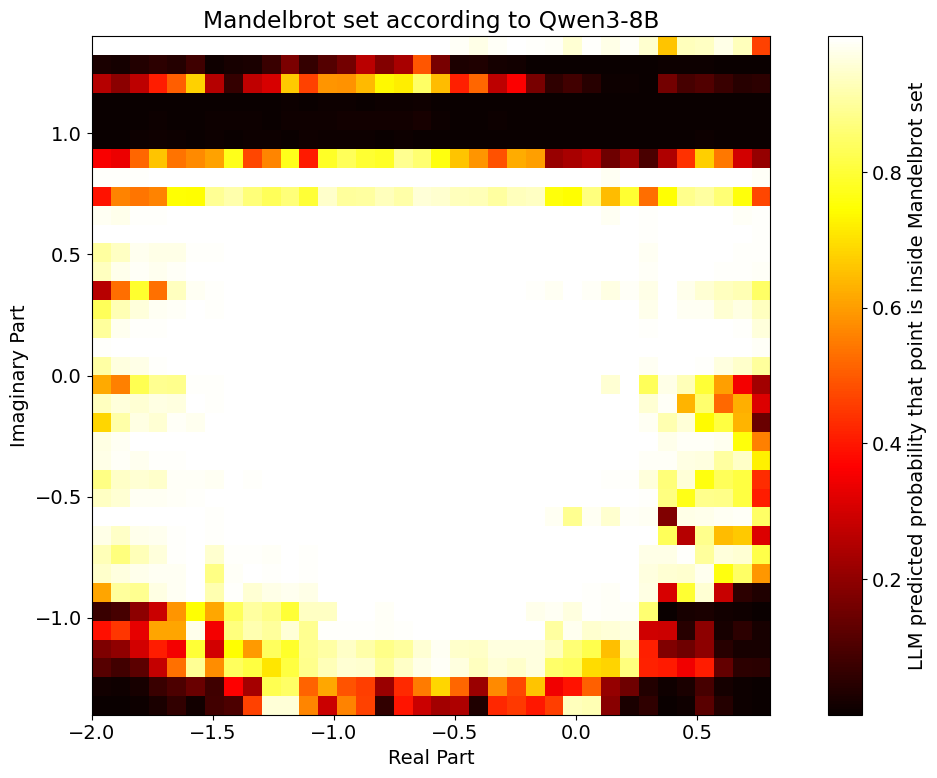

In [19]:
in_set_mandelbrot_probs = [softmaxes[0] for softmaxes in mandelbrot_probs]
two_d_in_set_mandelbrot_probs = np.array(in_set_mandelbrot_probs).reshape(len(mandelbrot_x_coords), len(mandelbrot_y_coords))

plt.figure(figsize=(12, 8))
plt.imshow(two_d_in_set_mandelbrot_probs, cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
plt.colorbar(label='LLM predicted probability that point is inside Mandelbrot set')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Mandelbrot set according to Qwen3-8B')
plt.tight_layout()
plt.savefig('plots/mandelbrot_qwen3-8b.jpg')
